<a href="https://colab.research.google.com/github/Mauricio-Sousa-Araujo/Aprendizado_Estatistico/blob/master/lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [26]:
import zipfile                    #Ler e extrair o arquivo zip
from zipfile import ZipFile
import pandas as pd               
import numpy as np                #Para trabalhar com matrizes
import matplotlib.pyplot as plt
import sklearn 
from urllib.request import urlopen  
import os




In [27]:
URL = 'https://github.com/Mauricio-Sousa-Araujo/Aprendizado_Estatistico/blob/master/housing.zip?raw=true'
# open and save the zip file onto computer
url = urlopen(URL)
output = open('housing.zip', 'wb')    # note the flag:  "wb"        
output.write(url.read())
output.close()
# read the zip file as a pandas dataframe
df = pd.read_csv('housing.zip')   # pandas version 0.18.1 takes zip files       
# if keeping on disk the zip file is not wanted, then:
os.remove('housing.zip')   # remove the copy of the zipfile on disk
data=df



##<h1><b>1. Get Data </b></h1>

Extraindo e lendo os dados **negrito**

In [ ]:
#path_file='/content/drive/My Drive/Colab Notebooks/housing.zip'
path_file="https://github.com/Mauricio-Sousa-Araujo/Aprendizado_Estatistico/blob/master/housing.zip?raw=true"
url = urlopen(path_file)

with zipfile.ZipFile('housing.zip', 'r') as zip:
    # printing all the contents of the zip file 
    zip.printdir() 
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!')

FileNotFoundError: ignored

In [ ]:
data_name="housing.csv"
data=pd.read_csv(data_name)
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND



Vemos abaixo que o dataset possui 10 colunas(features) e um total de 20640 instâncias das quais 9 são do tipo float64 e uma é do tipo object(string nesse caso). Note também que o atributo total_bedrooms possui 20640-20433=207 instâncias não preenchidas(null). Chamando a função descripe, conseguimos mais informações sobre o data, como desvio padrão, média, min, max etc.


In [ ]:
print("Data info:")
data.info()
print()
print("Data Descripe:")
data.describe()

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

Data Descripe:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdba85f828>,
      dtype=object)

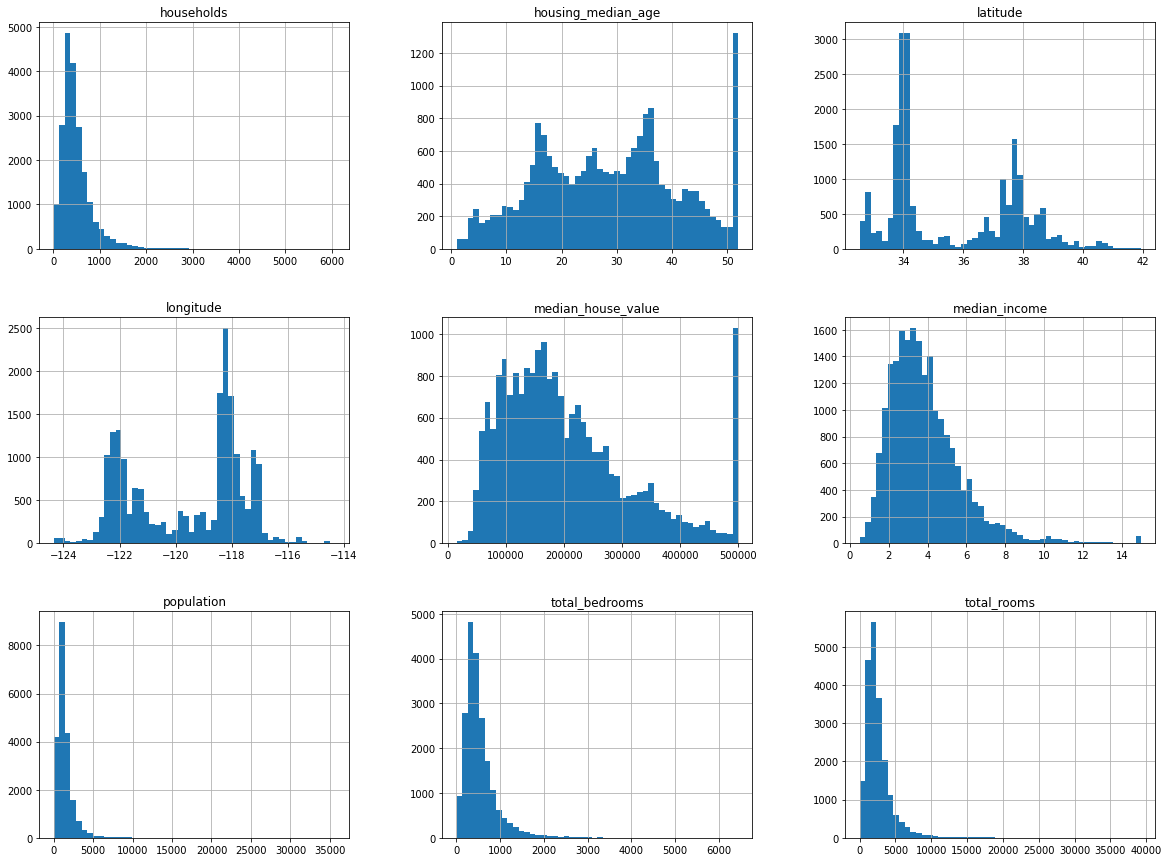

In [ ]:

data.hist(bins=50, figsize=(20,15))

##<h1><b>2. Creating Test set, Training set and Validation set     </b></h1>




In [28]:
def split_data(data,percentual):
  shuffled_indices = np.random.permutation(len(data))
  tam = int(len(data) * percentual)
  return data.iloc[shuffled_indices[:tam]] , data.iloc[shuffled_indices[tam:]]

In [29]:
data_train,data_test= split_data(data,0.8)  #80% para treino e 20% para teste
data_train,data_val = split_data(data_train,0.8)  #80% para treino e 20% para validação

print(f'Data Training possui : {data_train.values.shape[0]} instâncias ')
print(f'Data Validation possui : {data_val.values.shape[0]} instâncias ')
print(f'Data Test possui : {data_test.values.shape[0]} instâncias ')

Data Training possui : 13209 instâncias 
Data Validation possui : 3303 instâncias 
Data Test possui : 4128 instâncias 


##<h1><b>3. Discover and Visualize the Data to Gain Insights</b></h1>




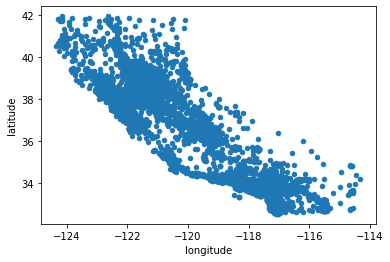

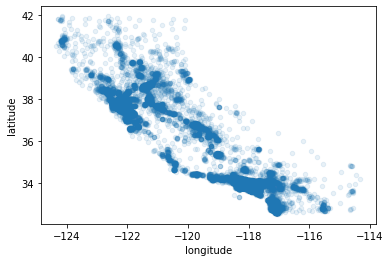

In [ ]:
#Mapa da california
data.plot(kind="scatter", x="longitude", y="latitude")
data.plot(kind="scatter", x="longitude", y="latitude",alpha=0.1)

In [ ]:
data["population"]

0         322.0
1        2401.0
2         496.0
3         558.0
4         565.0
          ...  
20635     845.0
20636     356.0
20637    1007.0
20638     741.0
20639    1387.0
Name: population, Length: 20640, dtype: float64

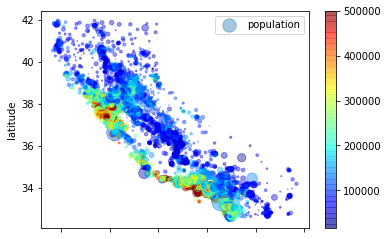

In [ ]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=data["population"]/100, label="population",
             c=data["median_house_value"], cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

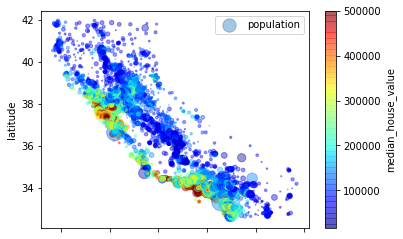

In [ ]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=data["population"]/100, label="population",
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

Quando estamos analisando dados, é importante não termos excesso de features, como features redundantes ou propriedades que não nos auxiliam para resolver o problema posto. Uma forma de calcularmos o quanto duas features estão 
relacionadas(por exemplo, se uma tem dependência linear da outra) é utilizar o Pearson's product-moment coefficient.
\begin{equation*}
 {\rho _{X,Y}=\operatorname {corr} (X,Y)={\operatorname {cov} (X,Y) \over \sigma _{X}\sigma _{Y}}={\operatorname {E} [(X-\mu _{X})(Y-\mu _{Y})] \over \sigma _{X}\sigma _{Y}}} 
 {={\operatorname {E} (XY)-\operatorname {E} (X)\operatorname {E} (Y) \over {\sqrt {\operatorname {E} (X^{2})-\operatorname {E} (X)^{2}}}\cdot {\sqrt {\operatorname {E} (Y^{2})-\operatorname {E} (Y)^{2}}}}}
\end{equation*}

Podemos estimar tal coeficiente pela fórmula:
\begin{equation*}
{\ r_{xy}\quad {\overset {\underset {\mathrm {def} }{}}{=}}\quad {\frac {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{(n-1)s_{x}s_{y}}}={\frac {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{\sqrt {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})^{2}\sum \limits _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}}} 
\end{equation*}

Pela



In [ ]:
data.corr(method="pearson")


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


Data Cleaning

In [ ]:

housing = data.drop("median_house_value", axis=1)#
housing_labels = data["median_house_value"].copy()


In [ ]:
housing.dropna(subset=["total_bedrooms"])    # option 1
housing.drop("total_bedrooms", axis=1)       # option 2
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median)     # option 3

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

Handling Text and Categorical Attributes

In [ ]:
from sklearn.preprocessingimport LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded
print(encoder.classes_)

SyntaxError: ignored

In [ ]:
from sklearn.preprocessingimport OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

SyntaxError: ignored

##<h1><b>4. Prepare the Data for Machine Learning Algorithms </b></h1>
Como supracitado, existem instâncias que não estão completamente preenchidas, então necessitamos tratar esses casos para que possamos dar como input para Machine Learning Algorithms(em sua grande maioria não trabalham com datasets com lacunas).

Podemos tratar esse problema com as seguintes abordagens:
1.   Livrar-se das instâncias que não estão completamente preenchidas.
2.   Livrar-se de todo a/o feature/atributo.
3.   Definir os valores que faltam para algum valor.No geral, temos dois tipos de abordagens:
  1.   Univariate Imputation: Nessa primeira abordagem, substituimos todos as lacunas de um atributo com simples valor, como a média, mediana ,zero etc.
  2.   Multivariate Imputation : Já nessa abordagem nós utilizamos o próprio dataset(as outras features) para estimar as lacunas.
  
Geralmente a abordagem mais utilizada é a 3, pois nas outras há perca de dados e para alguns problemas, os dados são escassos e valiosos.










In [ ]:
#Exemplo simples
data_train.dropna(subset=["total_bedrooms"])    # Primeira opção
data_train.drop("total_bedrooms", axis=1)       # Segunda opção
median = data_train["total_bedrooms"].median()
data_train["total_bedrooms"].fillna(median)     # Terceira opção Univariate Imputation

<h3><b>Utilizando a opção 3 </b></h3>

Note que se optarmos pela terceiro opção, quando tivermos novos dados, precisaremos preencher esse novo dado adequadamente para introduzi-lo como input de um determinado algortimo. Podemos fazer isso utilizando  [Imputation of missing values](https://scikit-learn.org/stable/modules/impute.html#impute) da biblioteca [sklearn](https://scikit-learn.org/stable/)

To apply MICE, create 5 copies (say) of this simple data set and cycle multiple times through the steps below for each copy:

Step 1: Replace (or impute) the missing values in each variable with temporary "place holder" values derived solely from the non-missing values available for that variable. For example, replace the missing age value with the mean age value observed in the data, replace the missing income values with the mean income value observed in the data, etc.

Step 2 Set back to missing the “place holder” imputations for the age variable only. This way, the current data copy contains missing values for age, but not for income and gender.

Step 3: Regress age on income and gender via a linear regression model (though it is possible to also regress age on only one of these variables); to be able to fit the model to the current data copy, drop all the records where age is missing during the model fitting process. In this model, age is the dependent variable and income and gender are the independent variables.

Step 4 Use the fitted regression model in the previous step to predict the missing age values. (When age will be subsequently used as an independent variable in the regression models for other variables, both the observed values of age and these predicted values will be used.) The article doesn't make it clear that a random component should be added to these predictions.

Step 5: Repeat Steps 2–4 separately for each variable that has missing data, namely income and gender.

Cycling through Steps 1 - 5 once for each of the variables age, income and gender constitutes one cycle. At the end of this cycle, all of the missing values in age, income an gender will have been replaced with predictions from regression models that reflect the relationships observed in the data between these variables.

In [30]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
data_aux=data_train.drop("ocean_proximity",axis=1)
imp.fit(data_aux)
data_aux=pd.DataFrame(imp.transform(data_aux),columns=data_aux.columns)
data_aux["ocean_proximity"]=data_train["ocean_proximity"].values
data_aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13209 entries, 0 to 13208
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           13209 non-null  float64
 1   latitude            13209 non-null  float64
 2   housing_median_age  13209 non-null  float64
 3   total_rooms         13209 non-null  float64
 4   total_bedrooms      13209 non-null  float64
 5   population          13209 non-null  float64
 6   households          13209 non-null  float64
 7   median_income       13209 non-null  float64
 8   median_house_value  13209 non-null  float64
 9   ocean_proximity     13209 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.0+ MB


In [ ]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data_train_fill=data_train.drop("ocean_proximity", axis=1)
columns=data_train_fill.columns
imputer.fit(data_train_fill)
data_train_fill=imputer.transform(data_train_fill)
data_train_fill = pd.DataFrame(data_train_fill, columns=columns)
data_train_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13209 entries, 0 to 13208
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           13209 non-null  float64
 1   latitude            13209 non-null  float64
 2   housing_median_age  13209 non-null  float64
 3   total_rooms         13209 non-null  float64
 4   total_bedrooms      13209 non-null  float64
 5   population          13209 non-null  float64
 6   households          13209 non-null  float64
 7   median_income       13209 non-null  float64
 8   median_house_value  13209 non-null  float64
dtypes: float64(9)
memory usage: 928.9 KB


Label Encoder

In [31]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data_aux['ocean_proximity'])
le.transform(data_aux['ocean_proximity'])
data_train_labeled=data_aux.copy()
data_train_labeled['ocean_proximity']=le.transform(data_train_labeled['ocean_proximity'])
data_train_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13209 entries, 0 to 13208
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           13209 non-null  float64
 1   latitude            13209 non-null  float64
 2   housing_median_age  13209 non-null  float64
 3   total_rooms         13209 non-null  float64
 4   total_bedrooms      13209 non-null  float64
 5   population          13209 non-null  float64
 6   households          13209 non-null  float64
 7   median_income       13209 non-null  float64
 8   median_house_value  13209 non-null  float64
 9   ocean_proximity     13209 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.0 MB


One Hot Encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False )
data_aux=np.resize(data_train["ocean_proximity"].values,(len(data_train["ocean_proximity"]),1))
ohe.fit(data_aux)
data_aux=np.resize(data_train["ocean_proximity"].values,(len(data_train["ocean_proximity"]),1)) #
ohe.transform(data_aux)
data_train_ohe=data_train.drop("ocean_proximity",axis=1)
data_aux=ohe.transform(data_aux)
for i in range(data_aux.shape[1]):
  data_train_ohe[f"ocean_proximity_{i}"]=data_aux[:,i]
data_train_ohe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_0,ocean_proximity_1,ocean_proximity_2,ocean_proximity_3,ocean_proximity_4
15583,-116.68,33.16,26.0,1820.0,374.0,1001.0,324.0,2.1797,156300.0,0.0,1.0,0.0,0.0,0.0
2316,-119.69,36.85,20.0,2655.0,432.0,1081.0,379.0,4.5398,143100.0,0.0,1.0,0.0,0.0,0.0
2869,-118.94,35.37,23.0,1106.0,252.0,790.0,230.0,1.8523,59700.0,0.0,1.0,0.0,0.0,0.0
18436,-121.84,37.25,17.0,2363.0,473.0,1369.0,442.0,4.8355,141600.0,1.0,0.0,0.0,0.0,0.0
17760,-121.83,37.33,27.0,3127.0,610.0,3257.0,604.0,4.6333,173600.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7810,-118.10,33.90,37.0,796.0,175.0,740.0,183.0,3.6000,156400.0,1.0,0.0,0.0,0.0,0.0
461,-122.26,37.87,52.0,2773.0,998.0,1721.0,949.0,1.1859,241700.0,0.0,0.0,0.0,1.0,0.0
12942,-121.27,38.65,25.0,2787.0,601.0,1247.0,522.0,2.9016,159800.0,0.0,1.0,0.0,0.0,0.0
6657,-118.12,34.15,19.0,557.0,216.0,673.0,212.0,2.1763,168800.0,1.0,0.0,0.0,0.0,0.0




<h1><b>. Feature Scaling </b></h1>




5

In [ ]:
class Framework():
  def __init__(self): 
  
    '''Data'''
    self.data=None
    self.data_train=None
    self.data_val=None
    self.data_test=None

    '''Tratamento de strings'''
    self.label_encoders=dict()
    self.one_hot_encoder=dict()

  def extracting_data(self,path_file='/content/drive/My Drive/Colab Notebooks/housing.zip'):
    with zipfile.ZipFile(path_file, 'r') as zip:
      # printing all the contents of the zip file 
      zip.printdir() 
      # extracting all the files 
      print('Extracting all the files now...') 
      zip.extractall() 
      print('Done!')
  
  def  get_data(self,data_name="housing.csv"):
    self.data=pd.read_csv(data_name)

  def  split_data(self,percentual_train=0.7275,percentual_val=0.1275,percentual_test=0.15):#85% para treino e 15% para teste
    self.data_train,self.data_test= self.split(data,percentual_train+percentual_val)        
    self.data_train,self.data_val = self.split(data_train,percentual_train/(percentual_train+percentual_val))                              #85% para train  e 20% para validação
    print(f'Data Training possui : {data_train.values.shape[0]} instâncias ')
    print(f'Data Validation possui : {data_val.values.shape[0]} instâncias ')
    print(f'Data Test possui : {data_test.values.shape[0]} instâncias ')

  def split(data,percentual):
    shuffled_indices = np.random.permutation(len(data))
    tam = int(len(data) * percentual)
    return data.iloc[shuffled_indices[:tam]] , data.iloc[shuffled_indices[tam:]]

  def treat_missing_values(self):
    pass
    
  def label_encoder_fit(self,feature_name_encoder='ocean_proximity'):
    le = sklearn.preprocessing.LabelEncoder()
    le.fit(data_train[feature_name_encoder])
    self.label_encoders[feature_name_encoder]=le

  def label_encoder_transform(self,feature_name_transform='ocean_proximity'):
    #self.label_encoders[feature_name_encoder]=le
    pass
  def one_hot_encoder_fit(self,feature_name_encoder='ocean_proximity'):
    pass
  def one_hot_encoder_transform(self,feature_name_encoder='ocean_proximity'):
    pass


De forma simplificada, temos que a ideia da regressão linear é reduzir o Mean  Square  Error(MSE). Essa equação mede o quão bom o nosso modelo se ajusta aos dados.
\begin{equation*}
MSE(\theta)= \frac{\sum^{m}_{i=1}[(\sum^{n}_{j=0}\theta_{j}x^{(i)}_{j})-y^{(i)}]^2}{m}
\end{equation*}, onde $\theta_js$ são os hiperparâmetros que serão ajustados para o modelo, $x_j^{(i)}$ é a entrada do modelo representando a j-ésima feature e a i-ésima instância, $y^{(i)}$ representa a variável que estamos tentando predizer. Além disso, $x_0^{(i)}$ é sempre igual a 1  para que bias term($\theta_0$) esteja sempre presente. Para acharmos o mínimo dessa função, podemos derivar em relação da cada $\theta$ e igualar a zero para achar o ponto mínimo, então:
\begin{equation*}
\frac{\partial MSE(\theta)}{\partial\theta_k}=\frac{\sum_{i=1}^{m}2x_k^{(i)}[(\sum^{n}_{j=0}\theta_{j}x^{(i)}_{j})-y^{(i)}]}{m} = \frac{2\sum_{i=1}^{m}x_k^{(i)}\sum_{j=0}^{n}\theta_jx^{(i)}_j-2\sum_{i=1}^m x_{k}^{(i)}y^{(i)}}{m}=0
\end{equation*} 
Portanto,
\begin{equation*}
\sum_{i=1}^{m}x_k^{(i)}\sum_{j=0}^{n}\theta_jx^{(i)}_j-\sum_{i=1}^m x_{k}^{(i)}y^{(i)}=0
\end{equation*} 

Repara que temos n+1 incógnitas($\theta s$) e n+1 equações, podemos recrever tais equações em notação matricial
\begin{equation*}
X^TX \theta =X^{T}Y
\end{equation*}
então:
$$\theta=((X^TX))^{-1}X^TY$$
 Onde X representa nossa matriz de entrada com a cada coluna representando uma feature e cada linha representando uma instância, Y(nosso Target) uma matriz com 1 coluna e cada linha representando uma instância e $\theta$ nosso hiperparâmetro de uma coluna e n linhas. 
 Tal equação é mais conhecida como a equação normal e com auxílio de bibliotecas o problema fica facilmente resolvível,resolvemos apenas com algumas linhas de código, como abaixo:

In [46]:
n_rows=len(data_train_labeled)
X= data_train_labeled.drop("median_income",axis=1).values
X =np.column_stack( [np.ones(n_rows),  X])
Y=np.resize( data_train_labeled["median_income"].values,(n_rows,1) )
    
def fit(X,Y):
  return np.dot( np.dot( np.linalg.inv( np.dot( X.T,X ) ), X.T) ,Y) #Equação

In [49]:
Theta=fit(X,Y)
Theta

array([[ 4.26259265e+00],
       [ 1.28015197e-02],
       [-3.86423475e-03],
       [-2.11494048e-02],
       [ 8.76038266e-04],
       [-5.16343592e-03],
       [-2.95457609e-05],
       [ 7.28583444e-04],
       [ 1.01551195e-05],
       [-5.79925051e-02]])

Também podemos utilizar a biblioteca sklearn para tal tarefa

---



In [57]:
from sklearn.linear_model import LinearRegression
n_rows=len(data_train_labeled)
X= data_train_labeled.drop("median_income",axis=1).values
Y=np.resize( data_train_labeled["median_income"].values,(n_rows,1) )
reg = LinearRegression()
reg.fit(X,Y)
print(reg.intercept_)
reg.coef_


[4.26259265]


array([[ 1.28015197e-02, -3.86423475e-03, -2.11494048e-02,
         8.76038266e-04, -5.16343592e-03, -2.95457609e-05,
         7.28583444e-04,  1.01551195e-05, -5.79925051e-02]])

##<h1><b> Feature Scaling  </b></h1>

Temos que para <b>Padronizar</b> os dados  aplicamos a fórmula $$x_{changed}=\frac{x-\mu}{\sigma}$$

Já para <b>Normalizar</b> os dados podemos fazer de algumas fórmulas, por exemplo, podemos usar Min-Max:
$$x_{changed}=\frac{x- x_{min}}{x_{max}-x{min}} $$ Para mais informações sobre qual modelo é melhor [aqui](https://medium.com/data-hackers/normalizar-ou-padronizar-as-vari%C3%A1veis-3b619876ccc9). Mas de forma resumida,as duas técnicas tem o mesmo objetivo: transformar todas as variáveis na mesma ordem de grandeza. E a diferença básica é que padronizar as variáveis irá resultar em uma média igual a 0 e um desvio padrão igual a 1. Já normalizar tem como objetivo colocar as variáveis dentro do intervalo de 0 e 1, caso tenha resultado negativo -1 e 1.Na dúvida de qual modelo escolher, teste os dois modelos. Podemos aplicar tais fórmulas facilmente usando a biblioteca sklearn, respectivamente:




In [68]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data_train_labeled)
scaler.transform(data_train_labeled)

array([[ 1.3038378 , -1.24824087, -0.83441124, ...,  0.32315839,
         0.12900355, -0.82037622],
       [ 0.56655946, -0.77993343, -0.99331291, ...,  0.64226804,
         0.65241337, -0.82037622],
       [ 1.17929754, -1.29975468, -0.51660789, ...,  0.47529328,
         0.7569226 ,  1.98878762],
       ...,
       [-2.24805039,  2.07674192, -0.91386208, ..., -0.66353455,
        -0.6224264 ,  1.98878762],
       [-1.33143409,  1.01836712,  1.46966306, ..., -0.66132435,
        -0.21561777,  1.28649666],
       [ 0.65124684, -0.70500424,  1.86691725, ..., -0.60575381,
         0.01240235, -0.82037622]])

In [61]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler().fit(data_train_labeled)
scaler.transform(data_train_labeled)


array([[0.73705179, 0.04361702, 0.33333333, ..., 0.27586516, 0.42804153,
        0.        ],
       [0.58964143, 0.15      , 0.29411765, ..., 0.31768527, 0.55298947,
        0.        ],
       [0.71215139, 0.03191489, 0.41176471, ..., 0.29580282, 0.57793782,
        1.        ],
       ...,
       [0.02689243, 0.79893617, 0.31372549, ..., 0.1465566 , 0.24866083,
        1.        ],
       [0.21015936, 0.55851064, 0.90196078, ..., 0.14684625, 0.34577383,
        0.75      ],
       [0.60657371, 0.16702128, 1.        , ..., 0.15412891, 0.4002066 ,
        0.        ]])